In [1]:
# !pip install --upgrade spacy && python -m spacy download en_core_web_trf
# !pip install spacy-transformers

In [2]:
import os
import warnings

import numpy as np
import pandas as pd
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from bs4 import BeautifulSoup
from tqdm import tqdm 

# from text_prep_utils.text_prep import Text_processing_pipeline
# nlp = spacy.load('en_core_web_trf')

warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/ytchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ytchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ytchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# path = (f'/content/drive/MyDrive/aidea_sentiment_analysis'
path = '.'
        
materials = pd.read_csv(f'{path}/materials/processed_IMDB_Dataset.csv')

print(materials.shape)
materials.head(10)

(50000, 2)


,sentiment,processed_review
0,1,one of the other reviewers has mentioned that ...
1,1,a wonderful little production. the filming tec...
2,1,i thought this was a wonderful way to spend ti...
3,0,basically there's a family where a little boy ...
4,1,"petter mattei's ""love in the time of money"" is..."
5,1,"probably my all-time favorite movie, a story o..."
6,1,i sure would like to see a resurrection of a u...
7,0,"this show was an amazing, fresh & innovative i..."
8,0,encouraged by the positive comments about this...
9,1,if you like original gut wrenching laughter yo...


<AxesSubplot:>

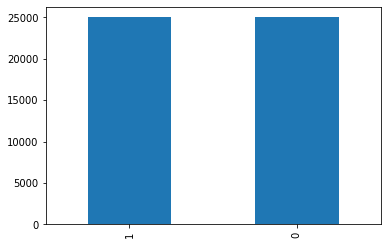

In [4]:
materials['sentiment'].value_counts().plot(kind='bar')

In [5]:
# try:
#     nlp = spacy.load('en_core_web_trf') # spacy model
# except:
#     raise ValueError('spaCy en_core_web_trf model not found.')

# Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text().lower()
    return text

def text_preprocessor(text):
    
    """
    - Lowercase the sentence
    - Change 'm to 'am'
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words
    - Remove trailing whitespace
    - Remove emojis
    """
    import re
    
    s = text

    emoji_clean= re.compile("["
                  u"\U0001F600-\U0001F64F"  # emoticons
                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                  u"\U00002702-\U000027B0"
                  u"\U000024C2-\U0001F251"
                  "]+", flags=re.UNICODE)

    # Change 'm to 'am'
    s = re.sub(r"\'m", "am", s)
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Removing the square brackets
    s = re.sub('\[[^]]*\]', '', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    s = re.sub(r'[^a-zA-z0-9\s]','',s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    # Remove emojis
    s = emoji_clean.sub(r'',s)

    return s

def preprocess(text):
    """remove_stop_words -> stemming -> lemmatize"""
    
    stop_words = set(stopwords.words('english'))
    ps = nltk.porter.PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
    word_tokens = word_tokenize(text)
    
    filtered_text = []
    
    for w in word_tokens:
        if not w.lower() in stop_words:
            filtered_text.append(lemmatizer.lemmatize(ps.stem(w)))
    
    return " ".join(filtered_text)

In [6]:
%%time
materials['processed_review'] = materials['processed_review'].apply(lambda x : strip_html(x))

CPU times: user 2.21 s, sys: 44.2 ms, total: 2.26 s
Wall time: 2.25 s


In [7]:
%%time
materials['processed_review'] = materials['processed_review'].apply(lambda x : text_preprocessor(x))

CPU times: user 8.51 s, sys: 1.02 ms, total: 8.51 s
Wall time: 8.51 s


In [8]:
%%time
materials['processed_review'] = materials['processed_review'].apply(lambda x : preprocess(x))

CPU times: user 2min 32s, sys: 729 ms, total: 2min 32s
Wall time: 2min 32s


In [9]:
materials

,sentiment,processed_review
0,1,one review mention watch 1 oz episod hook righ...
1,1,wonder littl product film techniqu unassum old...
2,1,thought wonder way spend time hot summer weeke...
3,0,basic famili littl boy jake think zombi closet...
4,1,petter mattei love time money visual stun film...
...,...,...
49995,1,thought movi right good job creativ origin fir...
49996,0,bad plot bad dialogu bad act idiot direct anno...
49997,0,cathol taught parochi elementari school nun ta...
49998,0,iam go disagre previou comment side maltin one...


In [10]:
# materials.to_csv(f'{path}/materials/processed_IMDB_Dataset.csv',index=0)

In [11]:
materials.sentiment = materials.sentiment.apply(lambda x : 1 if x == 'positive' else 0)

In [12]:
materials

,sentiment,processed_review
0,0,one review mention watch 1 oz episod hook righ...
1,0,wonder littl product film techniqu unassum old...
2,0,thought wonder way spend time hot summer weeke...
3,0,basic famili littl boy jake think zombi closet...
4,0,petter mattei love time money visual stun film...
...,...,...
49995,0,thought movi right good job creativ origin fir...
49996,0,bad plot bad dialogu bad act idiot direct anno...
49997,0,cathol taught parochi elementari school nun ta...
49998,0,iam go disagre previou comment side maltin one...


In [13]:
materials.to_csv('./materials/processed_IMDB_Dataset.csv',index=0)